# Bond with Embedded Calls and Put Options

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [1]:
from financepy.finutils import *
from financepy.products.bonds import *
from financepy.market.curves.FinDiscountCurve import FinDiscountCurve
from financepy.products.libor import *
from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.FinModelRatesBK import FinModelRatesBK

###################################################################
# FINANCEPY BETA Version 0.180 - This build: 22 Sep 2020 at 19:38 #
#     This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy #
###################################################################



## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [2]:
settlementDate = FinDate(1, 1, 2007)

### Set up discount curve

In [6]:
dcType = FinDayCountTypes.ACT_360
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swapType = FinLiborSwapTypes.PAYER
swap1 = FinLiborSwap(settlementDate, FinDate(1,1,2008), swapType, 0.05, fixedFreq, dcType)
swap2 = FinLiborSwap(settlementDate, FinDate(1,1,2009), swapType, 0.05, fixedFreq, dcType)
swap3 = FinLiborSwap(settlementDate, FinDate(1,1,2010), swapType, 0.05, fixedFreq, dcType)
swaps = [swap1, swap2, swap3]
discountCurve = FinLiborCurve(settlementDate, [], [], swaps)

In [7]:
print(discountCurve)

AttributeError: 'FinLiborSwap' object has no attribute '_payFixedFlag'

### Set up the Puttable Bond

First create a bond that we will use as a reference

In [8]:
issueDate = FinDate(1,1, 2000)
maturityDate = FinDate(1, 1, 2010)
coupon = 0.05
frequencyType = FinFrequencyTypes.ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA

In [9]:
bond = FinBond(issueDate, maturityDate, coupon, frequencyType, accrualType)

In [11]:
v = bond.cleanPriceFromDiscountCurve(settlementDate, discountCurve)

In [12]:
print("Pure Bond Price:", v)

Pure Bond Price: 99.62398708897757


Now specify the put and call dates

In [13]:
callDates = []
callPrices = []
putDates = [FinDate(1, 1, 2008), FinDate(1, 1, 2009), FinDate(1, 1, 2010)]
putPrices = [100.0, 100.0, 100.0]

Now create the FinBondEmbeddedOption

In [15]:
puttableBond = FinBondEmbeddedOption(issueDate, maturityDate, coupon, frequencyType, accrualType,
                                     callDates, callPrices, putDates, putPrices)

### The Hull-White Model

In [16]:
sigma = 0.01  # basis point volatility
a = 0.1
numTimeSteps = 200

In [17]:
model = FinModelRatesHW(sigma, a, numTimeSteps)

In [18]:
v = puttableBond.value(settlementDate, discountCurve, model)

In [19]:
print(v)

{'bondwithoption': 100.47863484272936, 'bondpure': 99.62398708897754}


### Convergence Testing

In [20]:
timeSteps = range(20,220,1)
values = []
for numTimeSteps in timeSteps:
    model = FinModelRatesHW(sigma, a, numTimeSteps)
    v = puttableBond.value(settlementDate, discountCurve, model)
    values.append(v['bondwithoption'])

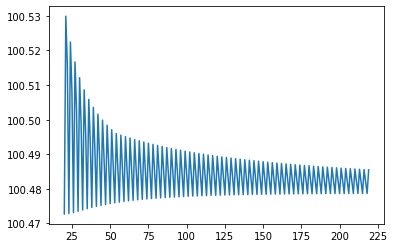

In [21]:
plt.plot(timeSteps, values)

Copyright (c) 2020 Dominic O'Kane